# Experiment with the GCKM

In [121]:
import numpy as np
import pandas as pd
import GCKM as G

In [128]:
data_size_vary = {}
runtime_collection = {}
data = pd.read_csv("crab_age.csv")
for i in range(7):
    import GCKM as G
    G = G.GaussianCopulaKmeansSynthesizer(data)
    G._identify_columns()
    G.convert_datetime_to_numerical()
    G.handle_missing_values()
    G.assign_intervals()
    G.preprocess_data()
    G.get_distribution()
    G.calculate_cdfs()
    G.standard_gaussian_all()
    G.optimal_clusters_dynamic()
    G.get_Kmeans()
    G.generate_data()
    G.generate_synthetic_data((i+1)*10000)
    G.post_process()
    data_size_vary[str((i+1)*10000) + "rows data"] = G.synthetic_data
    runtime_collection[str((i+1)*10000) + "rows data runtime"] = G.get_execution_times_df()

100%|██████████| 70000/70000 [01:23<00:00, 836.29it/s]


In [4]:
syn = G.synthetic_data

syn

,Weight,Diameter,Shucked Weight,Length,Height,Shell Weight,Age,Sex,Viscera Weight,id
0,41.698843,1.386346,16.222348,1.733412,0.478928,12.609553,11.353361,M,8.388398,12737
1,20.696747,1.039328,6.070421,1.386839,0.349111,6.913100,12.816468,I,5.102811,67955
2,26.844076,1.064998,13.710715,1.422959,0.393164,6.978751,7.924721,F,6.013923,27103
3,4.745291,0.779355,3.996753,0.987695,0.229850,0.611716,3.518203,F,1.093130,24619
4,0.056699,0.416515,0.028349,0.718618,0.090240,0.042524,3.858025,I,0.042524,32405
...,...,...,...,...,...,...,...,...,...,...
74046,37.050324,1.612500,14.597500,1.973778,0.566458,12.678027,14.877967,I,7.810601,8304
74047,15.669838,0.857072,7.122282,1.050973,0.280943,3.677568,5.120644,F,3.020412,3474
74048,17.663457,0.783859,8.449449,1.128365,0.248103,4.796131,5.809186,I,4.027110,53438
74049,0.056699,0.611428,0.028349,0.679041,0.196181,0.042524,3.495054,I,0.042524,41196


## Get the correlation heatmap of the synthetic

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import kaleido

In [6]:
syn.drop(["id"], axis = 1, inplace = True)

<Axes: >

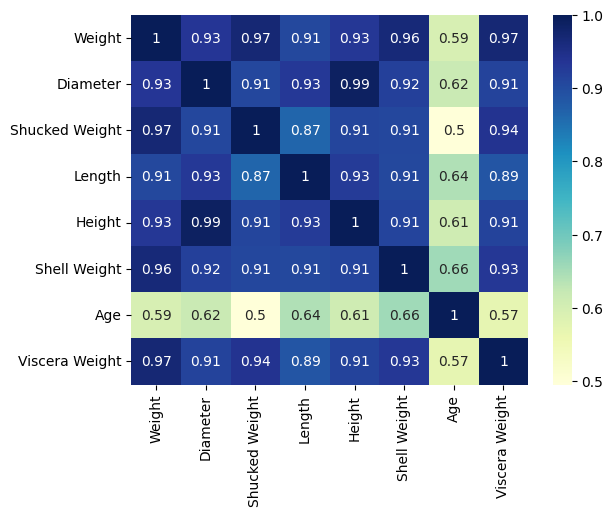

In [7]:
numeric_cols = syn.select_dtypes(include=np.number).columns.tolist()
corr_matrix_gckm = syn[numeric_cols].corr()
sns.heatmap(corr_matrix_gckm, annot=True, cmap='YlGnBu', cbar=True)

In [8]:
syn.to_csv("Finalized_gckm_syn.csv")

Now, we have the correlation heatmap which reveals the pairwise correlations between variables in a dataset, where each cell in the matrix corresponds to the correlation coefficient between two variables. Correlation coefficients quantify the strength and direction of the linear relationship between two variables.


## Let's check the original data's correlation heatmap and check for the difference

<Axes: >

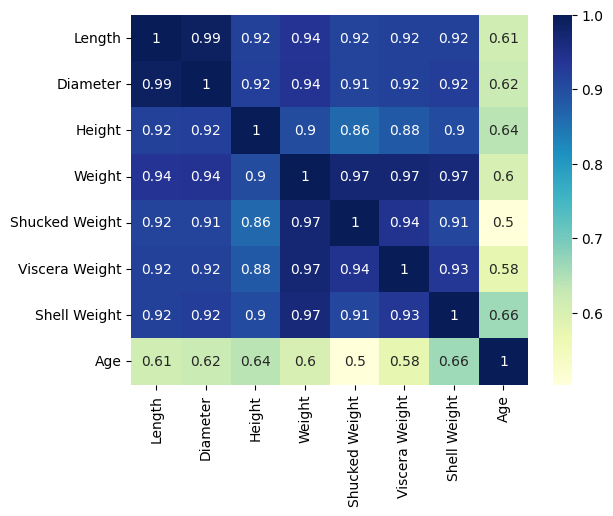

In [9]:
data = pd.read_csv("crab_age.csv")
data.drop(["id"], axis= 1, inplace= True)
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
corr_matrix_org = data[numeric_cols].corr()
sns.heatmap(corr_matrix_org, annot=True, cmap='YlGnBu', cbar=True)

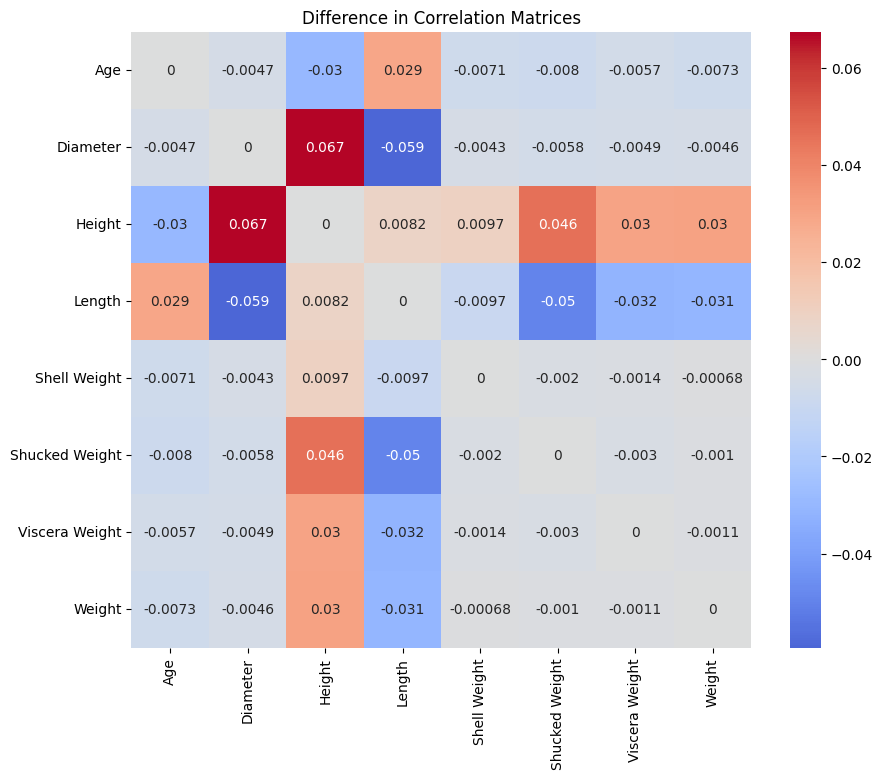

In [10]:
corr_diff = corr_matrix_gckm - corr_matrix_org

plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Correlation Matrices')
plt.show()

In [11]:
data_sdv = pd.read_csv('crab_age_syn_sdv.csv')


In [12]:
data_sdv.drop(["id"], axis = 1, inplace = True)

In [13]:
data_sdv.drop(["Unnamed: 0"], axis = 1, inplace= True)

<Axes: >

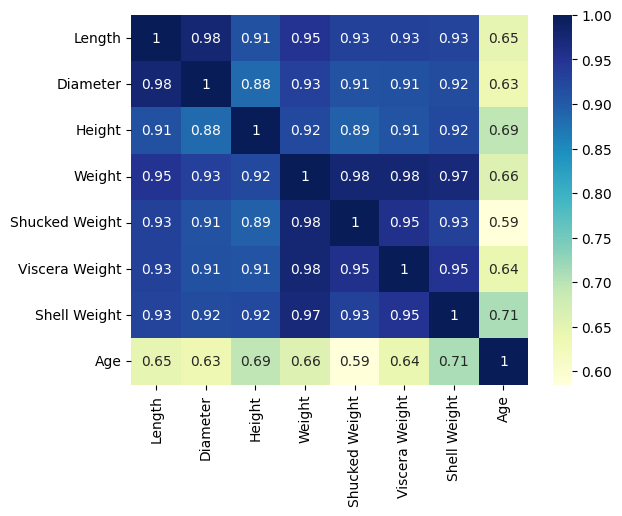

In [14]:
numeric_cols = data_sdv.select_dtypes(include=np.number).columns.tolist()
corr_matrix_sdv = data_sdv[numeric_cols].corr()
sns.heatmap(corr_matrix_sdv, annot=True, cmap='YlGnBu', cbar=True)

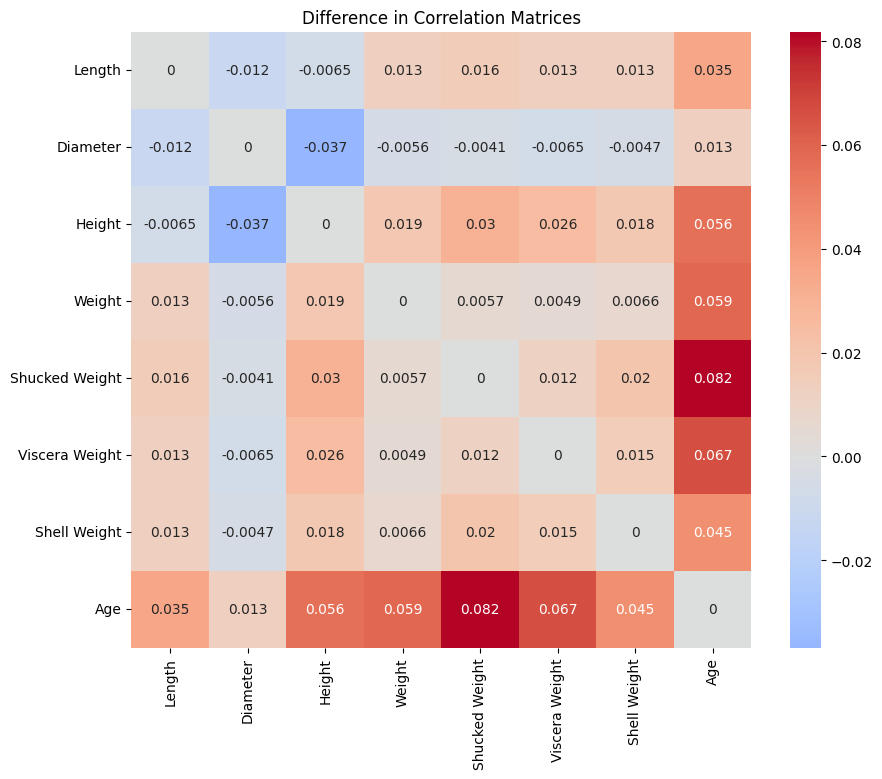

In [15]:
corr_diff = corr_matrix_sdv - corr_matrix_org

plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Correlation Matrices')
plt.show()

By comparison, We can see that gckm perform better than SDV in some columns such as Shucked Weight vs weight

## Fitting Machine Learning to see the performance of the synthetic data

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

import io

In [61]:
train_df = syn # Let model trained on the synthetic data
test_df = pd.read_csv("crab_age.csv") # Then predict the real data

In [62]:
test_df.drop(["id"], axis=1, inplace=True)

In [63]:
train_df

,Weight,Diameter,Shucked Weight,Length,Height,Shell Weight,Age,Sex,Viscera Weight
0,41.698843,1.386346,16.222348,1.733412,0.478928,12.609553,11,M,8.388398
1,20.696747,1.039328,6.070421,1.386839,0.349111,6.913100,13,I,5.102811
2,26.844076,1.064998,13.710715,1.422959,0.393164,6.978751,8,F,6.013923
3,4.745291,0.779355,3.996753,0.987695,0.229850,0.611716,4,F,1.093130
4,0.056699,0.416515,0.028349,0.718618,0.090240,0.042524,4,I,0.042524
...,...,...,...,...,...,...,...,...,...
74046,37.050324,1.612500,14.597500,1.973778,0.566458,12.678027,15,I,7.810601
74047,15.669838,0.857072,7.122282,1.050973,0.280943,3.677568,5,F,3.020412
74048,17.663457,0.783859,8.449449,1.128365,0.248103,4.796131,6,I,4.027110
74049,0.056699,0.611428,0.028349,0.679041,0.196181,0.042524,3,I,0.042524


In [64]:
test_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [65]:
train_df1 = train_df
train_df1["Age"] = np.round(train_df['Age']).astype(int)


In [66]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Distribution of Synthetic Crab Ages', 'Distribution of Real Crab Ages'))

fig1 = px.histogram(train_df1, x='Age', title='Distribution of synthetic Crab Ages')
fig2 = px.histogram(test_df, x='Age', title='Distribution of real Crab Ages')

# Add fig1 to the first column
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add fig2 to the second column
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout if needed (optional)
fig.update_layout(height=600, width=1200, title_text="Crab Age Distributions")

# Show the figure
fig.show()

In [67]:
true_label = test_df["Age"]

test_df.drop(["Age"], axis=1, inplace=True)

In [68]:
parameter_cols = set(train_df1.columns) - set(['Age'])

parameter_cols = list(parameter_cols)

parameter_cols

parameter_df = train_df1[parameter_cols]

target_column = train_df1["Age"]

In [69]:
test_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [70]:
parameter_df

,Weight,Diameter,Shucked Weight,Height,Length,Shell Weight,Sex,Viscera Weight
0,41.698843,1.386346,16.222348,0.478928,1.733412,12.609553,M,8.388398
1,20.696747,1.039328,6.070421,0.349111,1.386839,6.913100,I,5.102811
2,26.844076,1.064998,13.710715,0.393164,1.422959,6.978751,F,6.013923
3,4.745291,0.779355,3.996753,0.229850,0.987695,0.611716,F,1.093130
4,0.056699,0.416515,0.028349,0.090240,0.718618,0.042524,I,0.042524
...,...,...,...,...,...,...,...,...
74046,37.050324,1.612500,14.597500,0.566458,1.973778,12.678027,I,7.810601
74047,15.669838,0.857072,7.122282,0.280943,1.050973,3.677568,F,3.020412
74048,17.663457,0.783859,8.449449,0.248103,1.128365,4.796131,I,4.027110
74049,0.056699,0.611428,0.028349,0.196181,0.679041,0.042524,I,0.042524


In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
parameter_df[parameter_df.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(parameter_df[parameter_df.select_dtypes(include=np.number).columns.tolist()])
test_df[test_df.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(test_df[test_df.select_dtypes(include=np.number).columns.tolist()])

encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

encoder.fit(parameter_df[parameter_df.select_dtypes(exclude=np.number).columns.tolist()])
encoded_cols = encoder.get_feature_names_out()
encoded_cols

parameter_df[encoded_cols] = encoder.transform(parameter_df[parameter_df.select_dtypes(exclude=np.number).columns.tolist()])
test_df[encoded_cols] = encoder.transform(test_df[test_df.select_dtypes(exclude=np.number).columns.tolist()])

In [77]:
test_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,I,0.732750,0.703390,0.132743,0.361254,0.301278,0.307185,0.291978,0.0,1.0,0.0
1,I,0.499914,0.466102,0.097345,0.129449,0.106590,0.106131,0.118087,0.0,1.0,0.0
2,M,0.657421,0.661017,0.132743,0.308837,0.268325,0.256427,0.232686,0.0,0.0,1.0
3,F,0.828624,0.864407,0.176991,0.632194,0.482179,0.509197,0.525660,1.0,0.0,0.0
4,I,0.582091,0.593220,0.119469,0.290243,0.283457,0.207647,0.207773,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
74046,F,0.808080,0.762712,0.154867,0.632194,0.489913,0.479895,0.431988,1.0,0.0,0.0
74047,I,0.486218,0.491525,0.097345,0.129803,0.101883,0.104812,0.123069,0.0,1.0,0.0
74048,F,0.712206,0.720339,0.146018,0.367629,0.291190,0.348715,0.282511,1.0,0.0,0.0
74049,I,0.561547,0.559322,0.110619,0.208783,0.212172,0.133817,0.148979,0.0,1.0,0.0


In [82]:
input_cols = list(test_df.select_dtypes(include=np.number).columns.tolist()) + list(test_df.select_dtypes(exclude=np.number).columns.tolist())
input_cols = set(input_cols) - set(["Sex"])
input_cols = list(input_cols)

In [83]:
parameter_df = parameter_df[input_cols]
test_df = test_df[input_cols]

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [88]:
X_train, X_val, y_train, y_val = train_test_split(parameter_df, target_column, test_size=0.1, random_state=42)

In [90]:
def evaluate_model(model, X_train, y_train, X_val, y_val, y_pred):
    MAE = mean_absolute_error(y_val, y_pred)
    
    r2 = model.score(X_val, y_val)
    
    n = X_val.shape[0]
    p = X_val.shape[1]
    adjusted_r2 = adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
    RMSE = np.sqrt(mean_absolute_error(y_val, y_pred))
    
    R2 = model.score(X_val, y_val)
    
    return R2, adjusted_r2, RMSE, MAE


def metric_df(model, model_name):
    df = [evaluate_model(model, X_train, y_train, X_val, y_val, y_pred)]
    model_metrics = pd.DataFrame(data=df, columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MAE'])
    model_metrics.insert(0, 'Model', model_name)
    return model_metrics

In [91]:
prediction = []

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

model_metrics = metric_df(rf, 'Base Random Forest')
prediction.append(model_metrics)
model_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE,MAE
0,Base Random Forest,0.514513,0.513857,1.329708,1.768123


In [92]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid= {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,3,5,7],
    'criterion': ['squared_error', 'poisson']
}


rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5  #5 fold
)

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [93]:
rf_grid_search.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 400}

In [97]:
rf = RandomForestRegressor(criterion='squared_error',
                              max_depth=7,
                              n_estimators=400,
                              random_state=42)

In [98]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=400, random_state=42)

In [99]:
y_pred = rf.predict(X_val)
model_predicts = metric_df(rf, 'Random Forest')
prediction.append(model_predicts)
model_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE,MAE
0,Base Random Forest,0.514513,0.513857,1.329708,1.768123


In [100]:
test_df

,Sex_F,Weight,Diameter,Shucked Weight,Height,Length,Sex_M,Shell Weight,Viscera Weight,Sex_I
0,0.0,0.361254,0.703390,0.301278,0.132743,0.732750,0.0,0.291978,0.307185,1.0
1,0.0,0.129449,0.466102,0.106590,0.097345,0.499914,0.0,0.118087,0.106131,1.0
2,0.0,0.308837,0.661017,0.268325,0.132743,0.657421,1.0,0.232686,0.256427,0.0
3,1.0,0.632194,0.864407,0.482179,0.176991,0.828624,0.0,0.525660,0.509197,0.0
4,0.0,0.290243,0.593220,0.283457,0.119469,0.582091,0.0,0.207773,0.207647,1.0
...,...,...,...,...,...,...,...,...,...,...
74046,1.0,0.632194,0.762712,0.489913,0.154867,0.808080,0.0,0.431988,0.479895,0.0
74047,0.0,0.129803,0.491525,0.101883,0.097345,0.486218,0.0,0.123069,0.104812,1.0
74048,1.0,0.367629,0.720339,0.291190,0.146018,0.712206,0.0,0.282511,0.348715,0.0
74049,0.0,0.208783,0.559322,0.212172,0.110619,0.561547,0.0,0.148979,0.133817,1.0


In [101]:
y_true_pred = rf.predict(test_df)

In [104]:
y_true_pred = y_true_pred.tolist()

y_true_pred

[10.265307762922108,
 7.894041446036576,
 9.530644154127595,
 13.364811182863473,
 8.161976591561727,
 9.94935432685806,
 10.538043531449738,
 9.119865803595781,
 10.982615648387535,
 7.7316667024929755,
 7.049128350680709,
 9.263158742041309,
 10.315186304439303,
 7.908544949675649,
 8.8013801872982,
 6.9596022149160275,
 7.820399872457722,
 10.970084113274982,
 7.519904918937558,
 6.169977535249257,
 10.640730911424432,
 8.771850482063066,
 12.55376304663818,
 8.766796703901294,
 7.0797801620386895,
 10.364204911779412,
 8.050770190780097,
 8.760652907261798,
 9.101522902118694,
 5.83888869255191,
 8.62059715141713,
 10.240833251301579,
 10.581950529064953,
 8.159628945380684,
 10.138403268935768,
 9.992823752513674,
 12.422219498654929,
 8.658456226042446,
 4.540585166331994,
 7.632492776540051,
 10.962858848458733,
 10.453419740709602,
 10.149642057290563,
 12.613667631910493,
 10.997238086413835,
 7.405837178282549,
 7.774011343289194,
 14.111026280100337,
 10.169619938901723,
 8.

In [105]:
true_label = true_label.tolist()

true_label

[9,
 8,
 9,
 11,
 8,
 10,
 11,
 11,
 12,
 11,
 7,
 10,
 10,
 7,
 9,
 7,
 8,
 12,
 7,
 5,
 9,
 14,
 10,
 9,
 7,
 11,
 10,
 8,
 9,
 6,
 9,
 11,
 13,
 9,
 13,
 10,
 16,
 8,
 4,
 9,
 11,
 18,
 10,
 15,
 10,
 7,
 7,
 17,
 9,
 8,
 7,
 10,
 7,
 11,
 11,
 7,
 6,
 7,
 12,
 8,
 13,
 3,
 10,
 10,
 7,
 10,
 4,
 11,
 7,
 9,
 9,
 9,
 11,
 7,
 15,
 9,
 11,
 13,
 10,
 10,
 8,
 8,
 5,
 7,
 7,
 13,
 11,
 7,
 7,
 15,
 9,
 8,
 7,
 7,
 10,
 18,
 11,
 9,
 9,
 10,
 14,
 6,
 13,
 11,
 9,
 5,
 9,
 12,
 6,
 11,
 9,
 11,
 11,
 7,
 7,
 19,
 9,
 12,
 13,
 9,
 7,
 11,
 11,
 13,
 9,
 6,
 23,
 11,
 7,
 9,
 10,
 3,
 19,
 11,
 11,
 8,
 10,
 9,
 12,
 12,
 8,
 13,
 9,
 8,
 7,
 5,
 14,
 10,
 8,
 8,
 13,
 8,
 10,
 10,
 10,
 10,
 10,
 11,
 10,
 9,
 9,
 8,
 7,
 12,
 8,
 8,
 10,
 5,
 8,
 6,
 11,
 10,
 9,
 11,
 8,
 9,
 11,
 10,
 7,
 13,
 11,
 12,
 6,
 7,
 11,
 9,
 7,
 5,
 10,
 11,
 10,
 9,
 16,
 10,
 6,
 11,
 11,
 7,
 21,
 12,
 11,
 10,
 12,
 11,
 9,
 9,
 11,
 6,
 8,
 7,
 10,
 7,
 12,
 11,
 14,
 7,
 7,
 10,
 6,
 9,
 9,
 8,
 4,

In [110]:
def calculate_regression_metrics(y_true, y_pred):
    """
    Calculate various regression metrics.

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    dict: Dictionary containing MAE, MSE, RMSE, R-squared, and MAPE.
    """

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # MAPE calculation, avoiding division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

In [111]:
absolute_errors = calculate_regression_metrics(true_label, y_true_pred)

print(absolute_errors)

{'MAE': 1.5099942170510279, 'MSE': 5.365667189600558, 'RMSE': 2.316390983750489, 'R-squared': 0.4677809948009132, 'MAPE': 13.937737706300709}


## Learning Curve Evalutaion

In [ ]:
# data_size_vary
# runtime_collection

In [127]:
data_size_vary

{}

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# Loading real data
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"], axis=1, inplace=True)

# Extract target column and input columns from real data
target_column = 'Age'
input_columns = real_data.drop(columns=[target_column]).columns.tolist()

input_columns = list(real_data.select_dtypes(include=np.number).columns.tolist()) + list(real_data.select_dtypes(exclude=np.number).columns.tolist())
input_columns = set(input_columns) - set(["Sex"])
input_columns = list(input_columns)

# Function for learning curve evaluation
def learning_curve_evaluation(data_sizes, real_data, target_column, input_columns):
    performance_metrics = []

    for size, synthetic_data in data_sizes.items():
        # Preprocessing
        X_synthetic = synthetic_data[input_columns]
        y_synthetic = synthetic_data[target_column]
        X_real = real_data[input_columns]
        y_real = real_data[target_column]
        scaler = MinMaxScaler()
        X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()])
        X_real[X_real.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_real[X_real.select_dtypes(include=np.number).columns.tolist()])

        encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

        encoder.fit(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        encoded_cols = encoder.get_feature_names_out()
        encoded_cols

        X_synthetic[encoded_cols] = encoder.transform(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        X_real[encoded_cols] = encoder.transform(X_real[X_real.select_dtypes(exclude=np.number).columns.tolist()])

        # Train-test split for synthetic data
        X_train, X_val, y_train, y_val = train_test_split(X_synthetic, y_synthetic, test_size=0.1, random_state=42)

        # Model training and hyperparameter tuning
        rf = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model
        best_rf = grid_search.best_estimator_

        # Predictions and metrics
        y_pred = best_rf.predict(X_real)
        metrics = calculate_regression_metrics(y_real, y_pred)
        performance_metrics.append({'Data Size': size, **metrics})

    return pd.DataFrame(performance_metrics)

# Running the evaluation
learning_curve_results = learning_curve_evaluation(data_size_vary, real_data, target_column, input_columns)
learning_curve_results



,Data Size,MAE,MSE,RMSE,R-squared,MAPE
0,10000rows data,2.172455,5.315427,2.305521,0.472764,21.534760
1,20000rows data,1.304810,1.931540,1.389799,0.808411,12.926361
2,30000rows data,2.125672,5.087437,2.255535,0.495379,21.073852
3,40000rows data,2.168035,5.287762,2.299513,0.475508,21.504292
4,50000rows data,1.847249,3.840717,1.959775,0.619040,18.321290
5,60000rows data,2.074781,4.839666,2.199924,0.519955,20.582830
6,70000rows data,2.077843,4.859104,2.204338,0.518027,20.604165


In [135]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAE"], mode='lines+markers', name='MAE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["RMSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["R-squared"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAPE"], mode='lines+markers', name='MSE'))


# Update plot layout
fig.update_layout(title='Performance Metrics across Different Data Sizes',
                  xaxis_title='Data Size',
                  yaxis_title='Metric Value',
                  legend_title='Metrics')

# Show plot
fig.show()

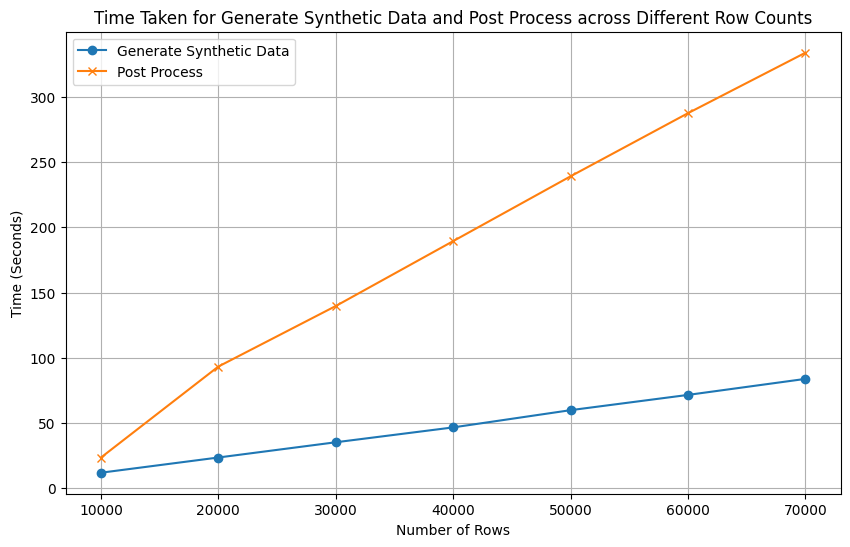

In [147]:
row_counts = [10000, 20000, 30000, 40000, 50000, 60000, 70000]
generate_syn_data_times = []
post_process_times = []
preprocess_data_times = []

for key, value in runtime_collection.items():
    generate_syn_data_times.append(value['Time (seconds)'][3])
    post_process_times.append(value['Time (seconds)'][4]) 
    preprocess_data_times.append(value['Time (seconds)'][2]) 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(row_counts, generate_syn_data_times, label='Generate Synthetic Data', marker='o')
plt.plot(row_counts, post_process_times, label='Post Process', marker='x')
#plt.plot(row_counts, preprocess_data_times, label='Pre Process', marker='v')
plt.xlabel('Number of Rows')
plt.ylabel('Time (Seconds)')
plt.title('Time Taken for Generate Synthetic Data and Post Process across Different Row Counts')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
post_process_times #50s/10000rows

[23.43945574760437,
 93.22890710830688,
 139.65793991088867,
 189.4233775138855,
 239.13659381866455,
 287.5360310077667,
 333.88827085494995]

In [144]:
generate_syn_data_times # 12s/10000rows

[11.847518920898438,
 23.510351181030273,
 35.19671940803528,
 46.598905086517334,
 59.81438326835632,
 71.51638197898865,
 83.79911947250366]